<a href="https://colab.research.google.com/github/Aaditya14x/Aaditya14x/blob/main/Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 128  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [2]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [3]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [4]:
autoencoder.compile(optimizer='RMSprop', loss='binary_crossentropy')

In [5]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [6]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [7]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 13s 45ms/step - loss: 0.2771 - val_loss: 0.2089
Epoch 2/50
235/235 [==============================] - 7s 29ms/step - loss: 0.1886 - val_loss: 0.1707
Epoch 3/50
235/235 [==============================] - 8s 32ms/step - loss: 0.1611 - val_loss: 0.1499
Epoch 4/50
235/235 [==============================] - 6s 27ms/step - loss: 0.1442 - val_loss: 0.1363
Epoch 5/50
235/235 [==============================] - 4s 18ms/step - loss: 0.1323 - val_loss: 0.1258
Epoch 6/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1230 - val_loss: 0.1175
Epoch 7/50
235/235 [==============================] - 3s 15ms/step - loss: 0.1154 - val_loss: 0.1106
Epoch 8/50
235/235 [==============================] - 3s 15ms/step - loss: 0.1091 - val_loss: 0.1049
Epoch 9/50
235/235 [==============================] - 5s 19ms/step - loss: 0.1040 - val_loss: 0.1004
Epoch 10/50
235/235 [==============================] - 3s 15ms/step - loss: 0.0999 - val_l

In [8]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 2ms/step


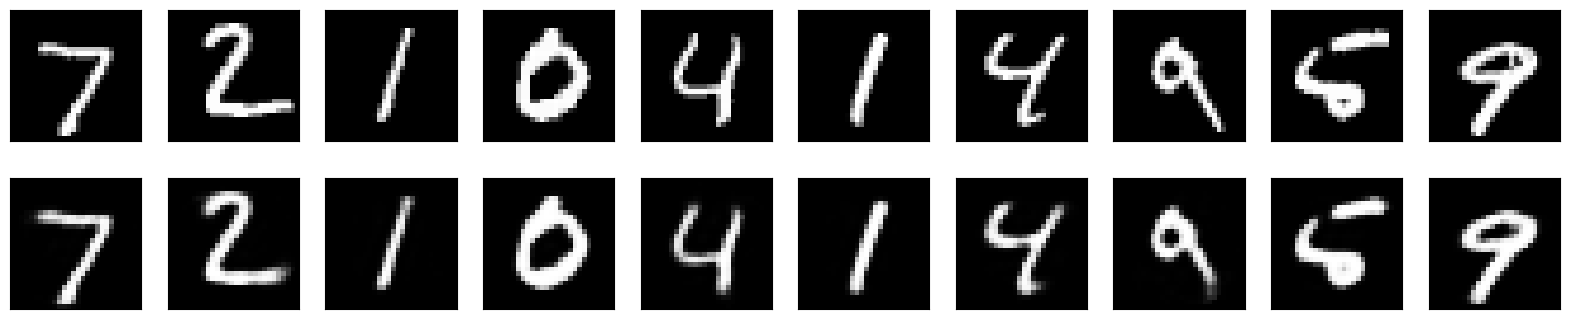

In [9]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [10]:
from keras.layers import Input, Dense
from keras.models import Model

# Define the size of the encoded representation
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# Input placeholder
input_img = Input(shape=(784,))

# Encoding layers
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# Decoding layers
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# Autoencoder model
autoencoder = Model(input_img, decoded)

# Encoder model
encoder = Model(input_img, encoded)

# Decoder model
encoded_input = Input(shape=(encoding_dim,))
decoder_layer1 = autoencoder.layers[-3]
decoder_layer2 = autoencoder.layers[-2]
decoder_layer3 = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer3(decoder_layer2(decoder_layer1(encoded_input))))


In [11]:
# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))



Epoch 1/50
235/235 [==============================] - 7s 23ms/step - loss: 0.2451 - val_loss: 0.1683
Epoch 2/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1525 - val_loss: 0.1376
Epoch 3/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1302 - val_loss: 0.1229
Epoch 4/50
235/235 [==============================] - 5s 22ms/step - loss: 0.1205 - val_loss: 0.1168
Epoch 5/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1160 - val_loss: 0.1127
Epoch 6/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1125 - val_loss: 0.1101
Epoch 7/50
235/235 [==============================] - 5s 22ms/step - loss: 0.1095 - val_loss: 0.1068
Epoch 8/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1070 - val_loss: 0.1045
Epoch 9/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1048 - val_loss: 0.1023
Epoch 10/50
235/235 [==============================] - 5s 22ms/step - loss: 0.1029 - val_lo

In [12]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 2ms/step


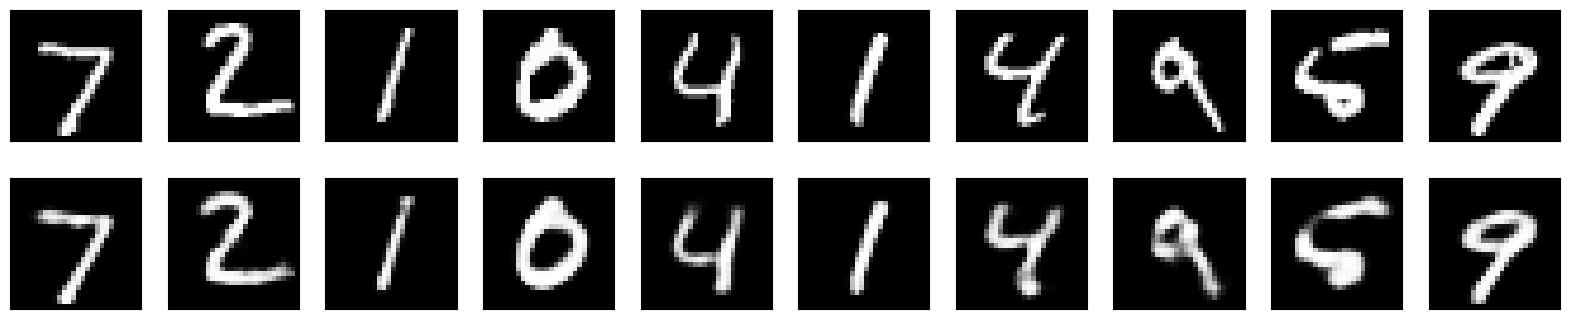

In [13]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()